# Analysis of "Investigating Public Attitudes towards Brain Data Collection and Use"

This is the Jupyter Notebook for the analysis of the study data based on the paper "Privacy in the Age of Neurotechnology: Investigating Public Attitudes towards Brain Data Collection and Use". We want to perform quantitative analyses and interpret the results with the goal of understanding people's attitudes towards sharing brain data, collected by Brain-Computer Interfaces with different recipients.

The paper can be found here: https://dl.acm.org/doi/10.1145/3576915.3623164

Learning Objectives:
- Practice research methods by analysing quantitative data
- See privacy conceptual theory used in practice (CI framework as seen in the lecture)
- Interpret results with the goal of understanding people's attitudes towards brain data sharing

## Overall Acceptability

First we import libraries and create a dataframe based on our data which includes the acceptability scores for all 287 participants (without conditions).

_The underlying question for these results was: "How acceptable is it for you to share brain data information, collected by a BCI headset with the following recipients?"_

For this, the following scale was used: 

- Completely unacceptable (-2)
- Somewhat unacceptable (-1)
- Neutral (0)
- Somewhat acceptable (1)
- Completely acceptable (2)

In [1]:
!pip install plotly.express

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_acceptability = pd.read_csv('bciacceptability.csv')
df_acceptability.head(5)


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip


,its manufacturer,online service providers,academic researchers,entertainment companies,users' professor/teacher,users' medical doctor,users' social media accounts,government agencies,users' employer,users' immediate family members
0,0.0,-2.0,0.0,-2.0,-1.0,2.0,-1.0,-2.0,-2.0,-1.0
1,-1.0,-2.0,-2.0,-2.0,0.0,1.0,-2.0,-2.0,-2.0,0.0
2,-2.0,-2.0,2.0,-1.0,-1.0,1.0,-2.0,-2.0,-2.0,0.0
3,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,1.0,1.0
4,-2.0,-2.0,1.0,-2.0,1.0,2.0,-2.0,-2.0,-2.0,0.0


### Task 1: Compute the mean values of all scores over all recipients in the dataframe and print them

In [2]:
### Your solution here 

# solution: 
# sorting is optional but provides better readability for the plots
mean_bci_acceptability = pd.DataFrame(df_acceptability.mean().sort_values(ascending=False)).transpose()
mean_bci_acceptability

,users' medical doctor,academic researchers,users' immediate family members,users' professor/teacher,its manufacturer,entertainment companies,users' employer,online service providers,users' social media accounts,government agencies
0,1.327526,0.74216,0.12892,-0.031359,-0.351916,-0.958188,-1.0,-1.073171,-1.222997,-1.358885


### Task 2: Plot the values and show the acceptability scores in a graph. 

Hints:
- You can use Pyplot, documentation: https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html
- Use a color scale for indicating the values of the data based on the scale -2 to 2 (see above)
- For more readability, sort the values by the average scores of the recipients

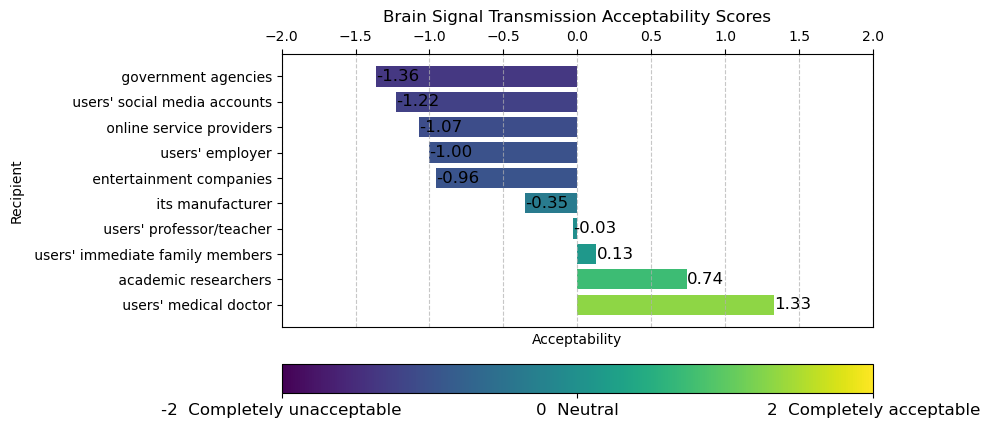

In [3]:
### Your solution here 

# solution: 
# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 4.5))

# Plot horizontal bar chart
bar = ax.barh(mean_bci_acceptability.columns, mean_bci_acceptability.mean(), color=plt.cm.viridis((mean_bci_acceptability.mean() + 2) / 4))

# Add text labels
for rect in bar:
    width = rect.get_width()
    ax.text(width, rect.get_y() + rect.get_height() / 2, f'{width:.2f}', ha='left', va='center', fontsize=12, color='black')

# Set axis labels and title
ax.set_xlabel('Acceptability')
ax.set_ylabel('Recipient')
ax.set_title('Brain Signal Transmission Acceptability Scores')

# Set ticks and grid
ax.set_xticks(np.arange(-2, 2.1, 0.5))
ax.set_yticks(mean_bci_acceptability.columns)
ax.xaxis.tick_top()
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Create custom colorbar
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=-2, vmax=2)), ax=ax, orientation='horizontal', pad=0.1)
cbar.set_ticks([-2, 0, 2])
cbar.set_ticklabels(['-2  Completely unacceptable', '0  Neutral', '2  Completely acceptable'])
cbar.ax.tick_params(labelsize=12)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Task 3: What can you read from that plot? E.g., regarding the most favored and least favored recipient?

Scores show the acceptability scores over the recipients. The higher the score, the more open are the participants of sharing their brain data with the different recipients. Medical doctors and academic reseachers are the most favored over all recipients, so participants are likely more open to share their data. Government agencies and social media platforms are the least favored recipients, means participants do not like to share their brain signals with these recipients.

## Conditional Acceptability

Now let's a look at the responses, where we asked the participants under which conditions they would share their brain data. Concretely, we asked to rate the acceptability of sharing brain signals with the different recipients (10 in total) based on different conditions/transmission principles (15 in total including the null principle).

Let's first read the data. 

### Task 4: Read in the csv file 'mean_scores.csv' and create a dataframe. 

Note:
The NaN data cells indicate that there are no results since the recipient and the condition do not match. E.g., it is not common for an employer to collect data to improve the device performance.

In [31]:
### your solution here

# solution:
df_acceptability_conditions = pd.read_csv('mean_scores.csv')
df_acceptability_conditions.head(5)

,principle,users' social media accounts,users' employer,entertainment companies,government agencies,online service providers,users' professor/teacher,its manufacturer,users' immediate family members,academic researchers,users' medical doctor
0,if data is collected for medical assessment an...,NaN,-0.515679,NaN,-0.289199,0.425087,NaN,0.923345,0.574913,0.951220,1.219512
1,if data is kept confidential and secure,-0.571429,-0.592334,-0.264808,-0.445993,0.090592,0.069686,0.505226,0.247387,0.860627,1.055749
2,if data is stored online for a limited period,-0.895470,-0.888502,-0.648084,-0.804878,-0.480836,-0.306620,-0.348432,-0.118467,0.289199,0.501742
3,if data is used for academic research,NaN,NaN,NaN,-0.229965,0.334495,0.358885,0.599303,NaN,0.916376,NaN
4,if data is used for marketing,-1.456446,NaN,-1.383275,NaN,-1.439024,NaN,-1.449477,NaN,NaN,NaN


### Task 5: Plot the data by creating a heatmap with the recipients and the conditions. 

Hints: 
- A heatmap shows colored cells indicating the values, in this case on a scale from -2 to 2. You can use color scales for visualizing the values (> coloraxis_colorbar).
- Check this documentation for help: https://matplotlib.org/stable/gallery/images_contours_and_fields/image_annotated_heatmap.html
- Place the principles on one axis and the recipients on the other 

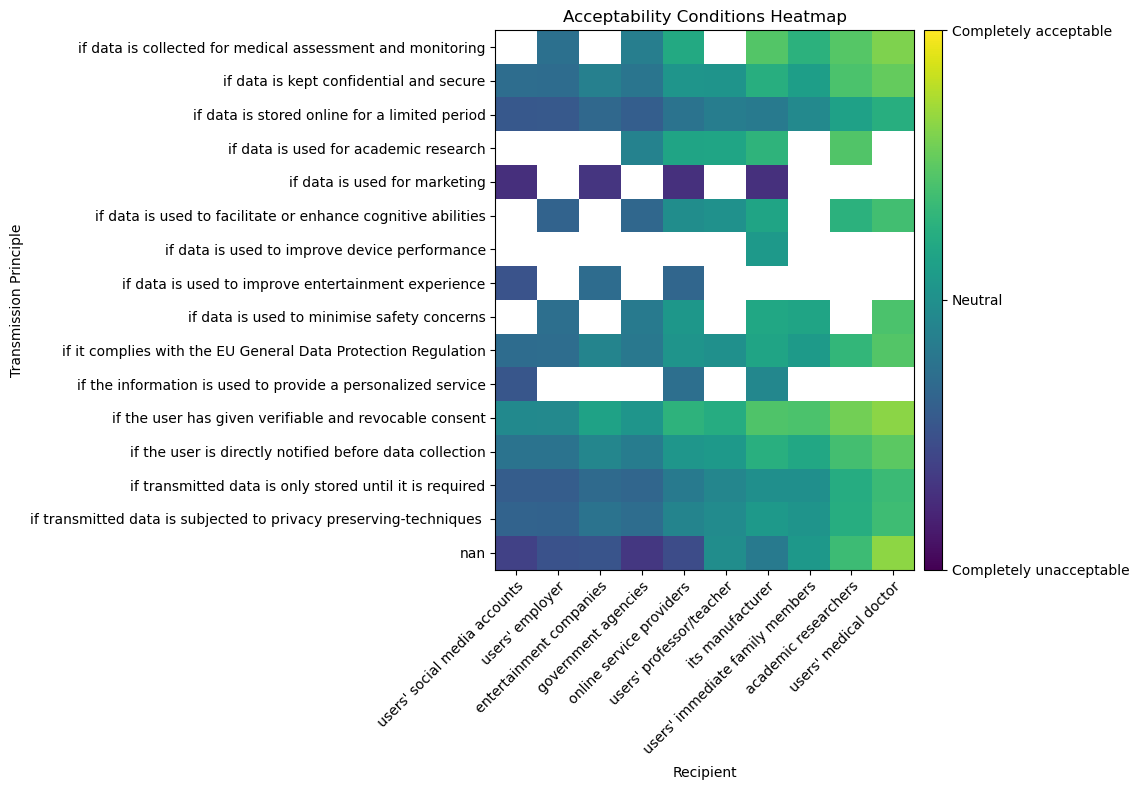

In [32]:
### your solution here 

# solution:
# Assuming df_acceptability_conditions is a DataFrame
df_acceptability_conditions.set_index('principle', inplace=True)

# Create the heatmap
fig, ax = plt.subplots(figsize=(11, 8))

im = ax.imshow(df_acceptability_conditions, cmap='viridis', vmin=-2, vmax=2, aspect='auto', origin='upper')

# Set the font size for the axis labels
ax.set_xticks(np.arange(len(df_acceptability_conditions.columns)))
ax.set_yticks(np.arange(len(df_acceptability_conditions.index)))
ax.set_xticklabels(df_acceptability_conditions.columns, fontsize=10)
ax.set_yticklabels(df_acceptability_conditions.index, fontsize=10)

# Create colorbar
cbar = plt.colorbar(im, ax=ax, orientation='vertical', pad=0.02, aspect=30)
cbar.set_ticks([-2, 0, 2])
cbar.set_ticklabels(['Completely unacceptable', 'Neutral', 'Completely acceptable'])
cbar.ax.tick_params(labelsize=10)

# Set axis labels and title
ax.set_xlabel('Recipient', fontsize=10)
ax.set_ylabel('Transmission Principle', fontsize=10)
ax.set_title('Acceptability Conditions Heatmap', fontsize=12)

# Rotate x-axis labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Show the plot
plt.tight_layout()
plt.show()


### Task 6: What can you read from the heatmap? Interpret the results by answering the following questions: 
- Which condition is acceptable? 
- Which condition is unacceptable?
- Which recipient is the most acceptable? 
- Which recipient is the least acceptable? 
- Do you notice differences to the results of the first plot?

Acceptable condition: "if the user has given consent", means there is a need for usable and understandable consent. Unacceptable condition: "if data is used for marketing", regardless of recipients.
Acceptable recipients: Again medical doctors and researchers, similar to first plot (can be read from graph if values are sorted).
Unacceptable recipients: social media accounts and employer, government agencies not least favored anymore (can be read from graph if values are sorted).

## Demographics
Let's look at the demographics and background of our participants. 


### Task 7: Read the csv file 'demographic_data.csv' and write the data to a dataframe.

In [38]:
### Your solution here

# solution:
demographic_data = pd.read_csv('demographic_data.csv')
demographic_data.head(5)

,Age Group,Country,What is your gender? [Woman],What is your gender? [Man],What is your gender? [Non-binary],What is your gender? [Prefer not to say],What is your gender? [Other],What is the highest level of education you have completed?,What is the highest level of education you have completed? [Other],Field of Education
0,25 - 34 years old,greece,No,Yes,No,No,NaN,"Trade, technical, or vocational training",NaN,"I have an education in, or work in, the field ..."
1,18 - 24 years old,portugal,Yes,No,No,No,NaN,Some college,NaN,"I do not have an education in, or work in, the..."
2,25 - 34 years old,portugal,No,Yes,No,No,NaN,Doctorate,NaN,"I have an education in, or work in, the field ..."
3,18 - 24 years old,poland,No,Yes,No,No,NaN,High school,NaN,"I have an education in, or work in, the field ..."
4,18 - 24 years old,portugal,No,Yes,No,No,NaN,Master's degree,NaN,"I have an education in, or work in, the field ..."


### Task 8: Age groups. Compute the sum of the different age groups to identify the ages of our participants. You don't have to create a plot. A table or dataframe visualization is enough.

Hint:
- You can use Panda's function value_counts()
- See the documentation here: https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

In [35]:
### your solution here

# solution:
age_col = demographic_data.iloc[:, :1]

counts  = age_col['Age Group'].value_counts()
counts_age = pd.DataFrame({'Age Group': counts.index, 'Count': counts.values})
total_count = counts_age['Count'].sum()
# Calculate the percentage for each value
counts_age['Percentage'] = round(counts_age['Count'] / total_count * 100, 2)
counts_age

,Age Group,Count,Percentage
0,25 - 34 years old,115,40.07
1,18 - 24 years old,115,40.07
2,35 - 44 years old,36,12.54
3,45 - 54 years old,17,5.92
4,55 - 64 years old,4,1.39


### Task 9: Field of Education. How many participants reported to have an IT background?
We asked "Which of the following best describes your educational background or job field?" and possible answers were 
- "I have an education in, or work in, the field of computer science, engineering, or IT.",
- "I do not have an education in, or work in, the field of computer science, engineering, or IT."
- "Prefer not to say"

Again, no need to visualize the data as plot.

In [37]:
### your solution here

# solution: 
counts  = demographic_data['Field of Education'].value_counts()
counts_education_field = pd.DataFrame({'Field of Education': counts.index, 'Count': counts.values})
total_count = counts_education_field['Count'].sum()
# Calculate the percentage for each value
counts_education_field['Percentage'] = round(counts_education_field['Count'] / total_count * 100, 2)
print(total_count)
counts_education_field

287


,Field of Education,Count,Percentage
0,"I do not have an education in, or work in, the...",157,54.70
1,"I have an education in, or work in, the field ...",122,42.51
2,Prefer not to say,8,2.79


#### What do we do with this information?

Based on the background information and demographics of study participants, crossed analysis can be done by comparing acceptability scores of two different groups.
One example could be to compute the mean acceptability scores of the participants that reported to have an IT background and of those who didn't. Interpreting the results could lead to interesting insights. 

In this case, the average acceptability scores of sharing brain signals with the different recipients under certain conditions of those who reported to have an IT background was higher than the scores from the other group. Interpreting this would mean that the first group is more open to share their brain data. Additionally, the statistical significance by executing signed rank tests can be shown. 

More information about statistical tests can be read here: https://en.wikipedia.org/wiki/Statistical_hypothesis_testing

## Summary

You learned:
- How to apply research methods by analysing and plotting quantitative data
- How CI is used in practice for studies 
- About people's attitudes towards brain data collection and use
- How demographics and background can lead to interesting insights of brain data sharing attitudes

If you are interested in this topic, we encourage you to read the full paper. 